<a href="https://colab.research.google.com/github/ahshawaf/AML/blob/master/Project5_Alshawaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from keras.utils import to_categorical
from pandas.plotting import scatter_matrix



Using TensorFlow backend.


#Loading Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ahshawaf/AML/master/diabetic_data.csv')

Get the size of the dataframe

#Exploring Data

In [4]:
len(df)

101766

In [5]:
df.shape

(101766, 50)

In [6]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


Check is there is a null values in columns

In [8]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

As from the above there is no null values.

Check if there is na value in the dataframe

In [9]:
df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

From the above, there is no na value in dataframe

From the sample data above, the missing data were marked as '?'. Let see in the dataframe and count them.

In [10]:
missing_data=df.isin(['?']).sum()
missing_data

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Calculate the percentage of the missing for the column that has that.

In [0]:
def cal_Percentage(attributeName,missing_data=missing_data,dataFrame=df):
    print('{0}: {1:.2f} % missing data'.format(attributeName,missing_data[attributeName]/len(df)*100))

In [12]:
for att in missing_data.keys():
  if missing_data[att] > 0:
    cal_Percentage(att)

race: 2.23 % missing data
weight: 96.86 % missing data
payer_code: 39.56 % missing data
medical_specialty: 49.08 % missing data
diag_1: 0.02 % missing data
diag_2: 0.35 % missing data
diag_3: 1.40 % missing data


From the above, it shows that the follwing attributes has missing data:
1.   race 2%
2.   weight 97%
3.   payer_code 40% 
4.   medical_specialty 49%
5.   diag_1 0.02%
6.   diag_2 0.35%
7.   diag_3 1.40%



##Correlation

#Dealing With Missing Data

For the attribute 'race', let see the distinct value to see how to deal with the missing values

In [13]:
race_values=df['race'].value_counts()
race_values

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

It could be concluded that the missing values could be replaces with the value Other as it is not a race rethar than 'Caucasian', 'AfricanAmerican', 'Hispanic', and 'Asian'.

Now, let replace the missing value '?' with the value 'Other'

First, get the key value of the 'Other' and the missing value '?'

In [14]:
other_value=race_values.keys()[4]
other_value

'Other'

In [15]:
missing_value=race_values.keys()[2]
missing_value

'?'

Replace the '?' with the value 'Other'

In [0]:
race_replaced_missing_values = df['race'].replace(missing_value, 
                 other_value) 

In [17]:
race_replaced_missing_values

0               Caucasian
1               Caucasian
2         AfricanAmerican
3               Caucasian
4               Caucasian
               ...       
101761    AfricanAmerican
101762    AfricanAmerican
101763          Caucasian
101764          Caucasian
101765          Caucasian
Name: race, Length: 101766, dtype: object

Check the output from the replace function

In [18]:
race_replaced_missing_values.value_counts()

Caucasian          76099
AfricanAmerican    19210
Other               3779
Hispanic            2037
Asian                641
Name: race, dtype: int64

Assign the output to the column 'race' which has replaced the '?' with 'Other'

In [0]:
df['race'] = race_replaced_missing_values

Check the distinct values of the column 'race'

In [20]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Other               3779
Hispanic            2037
Asian                641
Name: race, dtype: int64

So, now the race column has no missing value

In [21]:
df.isin([missing_value]).sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [22]:
df['medical_specialty'].value_counts()

?                                   49949
InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
                                    ...  
Pediatrics-InfectiousDiseases           1
Proctology                              1
SportsMedicine                          1
Speech                                  1
Surgery-PlasticwithinHeadandNeck        1
Name: medical_specialty, Length: 73, dtype: int64

Now, for the columns 
- weight (which is in Weight in pounds)

- payer_code (which is an Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay)

- medical_specialty (which is an Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon)

are to be deleted as these data could not affecte the predection accuracy. Because the waight column most of the data is missing, 97% missing data. For the other two attributes, payer_code and medical_specialty, are just codes.

In [0]:
df.drop({'weight','payer_code','medical_specialty'}, axis=1, inplace=True)


Check the result of drop function.

In [24]:
df.shape

(101766, 47)

In [25]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [26]:
df.isin([missing_value]).sum()

encounter_id                   0
patient_nbr                    0
race                           0
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazo

Now the df has only the follwing columns has missing data remaining:
diag_1                        
diag_2                        
and diag_3

In [0]:
df.replace(missing_value, np.nan,inplace=True)

Now check if the missing_value '?' is replaced with 'NaN'

In [28]:
df.isin([missing_value]).sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [29]:
df.isna().sum()

encounter_id                   0
patient_nbr                    0
race                           0
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazo

In [30]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


So, not the '?' is replced with 'NaN'

Now, delete the rows that has 'NaN'. It is going to delete the rows that has either one 'NaN' value or more in the columns diag_1, diag_2,  and diag_3 as they are only the columns has 'NaN' value.

In [0]:
df.dropna(axis=0,inplace=True)

Check the result after droping 'NaN'

In [32]:
df.shape

(100244, 47)

In [33]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


Check if there is a missing data

In [34]:
df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

So, there is no missing data.

Now, the ids columns are going to be deleted as there are just ids and cannot affect the predection accuracy. Also, to reduce the data complexity.

In [0]:
df.drop({'encounter_id','patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id'},axis=1,inplace=True)

In [36]:
df.shape

(100244, 42)

the df not reduced from 47 columns to 42 after deleting the ids columns

Now, lebel encode the data object columns only.

In [37]:
columns_obj=df.select_dtypes(object).columns
columns_obj

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [38]:
attr_their_cat = {}
la = LabelEncoder()
for column in columns_obj:
 df[column] = la.fit_transform(df[column])
 attr_their_cat[column] = la.classes_
df.shape

(100244, 42)

In [39]:
attr_their_cat

{'A1Cresult': array(['>7', '>8', 'None', 'Norm'], dtype=object),
 'acarbose': array(['Down', 'No', 'Steady', 'Up'], dtype=object),
 'acetohexamide': array(['No', 'Steady'], dtype=object),
 'age': array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
        '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object),
 'change': array(['Ch', 'No'], dtype=object),
 'chlorpropamide': array(['Down', 'No', 'Steady', 'Up'], dtype=object),
 'citoglipton': array(['No'], dtype=object),
 'diabetesMed': array(['No', 'Yes'], dtype=object),
 'diag_1': array(['10', '11', '110', '112', '114', '115', '117', '131', '133', '135',
        '136', '141', '142', '143', '145', '146', '147', '148', '149',
        '150', '151', '152', '153', '154', '155', '156', '157', '158',
        '160', '161', '162', '163', '164', '170', '171', '172', '173',
        '174', '175', '179', '180', '182', '183', '184', '185', '187',
        '188', '189', '191', '192', '193', '194', '195', '196', '197',
       

In [40]:
df.head() 

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2,0,1,3,59,0,18,0,0,0,143,78,121,9,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,1
2,0,0,2,2,11,5,13,2,0,1,454,77,766,6,2,2,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1,2
3,2,1,3,2,44,1,16,0,0,0,554,96,248,7,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,2
4,2,1,4,1,51,0,8,0,0,0,54,23,86,5,2,2,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,0,1,2
5,2,1,5,3,31,6,16,0,0,0,263,245,86,9,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,1,1,1


In [41]:
np.unique(df['diabetesMed'])

array([0, 1])

#Correlation

In [0]:
corr = df.corr()

In [43]:
corr['diabetesMed'].sort_values(ascending=False)

diabetesMed                 1.000000
insulin                     0.263910
metformin                   0.245927
num_medications             0.189820
glipizide                   0.182492
glyburide                   0.161837
pioglitazone                0.145354
rosiglitazone               0.135798
glimepiride                 0.114729
time_in_hospital            0.063118
repaglinide                 0.062592
glyburide-metformin         0.044673
nateglinide                 0.043725
num_lab_procedures          0.032845
acarbose                    0.029211
number_inpatient            0.026300
number_emergency            0.025812
number_diagnoses            0.025430
number_outpatient           0.017072
gender                      0.016248
chlorpropamide              0.015060
tolazamide                  0.010383
race                        0.009664
tolbutamide                 0.008287
miglitol                    0.008169
glipizide-metformin         0.006230
troglitazone                0.002993
m

In [44]:
corr['readmitted'].sort_values(ascending=False)

readmitted                  1.000000
change                      0.041627
num_procedures              0.040165
metformin                   0.031085
race                        0.014942
gender                      0.013850
max_glu_serum               0.013177
diag_1                      0.011739
glyburide                   0.006213
tolbutamide                 0.004072
metformin-rosiglitazone     0.003753
tolazamide                  0.003547
metformin-pioglitazone      0.002654
glimepiride                 0.001746
miglitol                    0.001291
chlorpropamide              0.000744
troglitazone               -0.000730
glyburide-metformin        -0.001458
A1Cresult                  -0.001524
glipizide-metformin        -0.001946
acetohexamide              -0.001959
glimepiride-pioglitazone   -0.001959
diag_2                     -0.002369
nateglinide                -0.003047
insulin                    -0.003878
pioglitazone               -0.005000
rosiglitazone              -0.006324
a

Separate the dependent columns which are 'diabetesMed' and 'readmitted' from the other columns, which are the independents

In [0]:
target=df.loc[:,'diabetesMed':'readmitted']
target_columns=target.columns

Now, compine the columns value to create one column

In [0]:
target_code= target['diabetesMed'].map(str)+target['readmitted'].map(str)

In [47]:
target_columns,target_code

(Index(['diabetesMed', 'readmitted'], dtype='object'), 1         11
 2         12
 3         12
 4         12
 5         11
           ..
 101761    11
 101762    12
 101763    12
 101764    12
 101765    02
 Length: 100244, dtype: object)

Now, the target is one column has the values of the independents columns values

In [48]:
target

,diabetesMed,readmitted
1,1,1
2,1,2
3,1,2
4,1,2
5,1,1
...,...,...
101761,1,1
101762,1,2
101763,1,2
101764,1,2


This costom function to translate the output code for exampe the output code is 
 01010 so it means 'diabetesMed_No   readmitted_NO

In [0]:
def translate_output_code(code):
  result = ''
  result= '{0} {1} {2} {3}'.format(result,' ','Diabetes: ',attr_their_cat['diabetesMed'][int(code[0])])
  result= '{0} {1} {2} {3}'.format(result,' ','Readmitted: ',attr_their_cat['readmitted'][int(code[1])])
  return result.strip()


In [50]:
np.unique(target_code)

array(['00', '01', '02', '10', '11', '12'], dtype=object)

In [51]:
translate_output_code('11')

'Diabetes:  Yes   Readmitted:  >30'

In [0]:
df.drop(target_columns,axis=1,inplace=True)

In [53]:
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change
1,2,0,1,3,59,0,18,0,0,0,143,78,121,9,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0
2,0,0,2,2,11,5,13,2,0,1,454,77,766,6,2,2,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1
3,2,1,3,2,44,1,16,0,0,0,554,96,248,7,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0
4,2,1,4,1,51,0,8,0,0,0,54,23,86,5,2,2,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,0
5,2,1,5,3,31,6,16,0,0,0,263,245,86,9,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,1


In [0]:
df['target']=target_code.astype(int)

In [55]:
corr_2=df.corr()
corr_2['target'].sort_values(ascending=False)

target                      1.000000
insulin                     0.262240
metformin                   0.249991
num_medications             0.181243
glipizide                   0.180006
glyburide                   0.162204
pioglitazone                0.143971
rosiglitazone               0.134237
glimepiride                 0.114559
repaglinide                 0.059227
time_in_hospital            0.053872
glyburide-metformin         0.044261
nateglinide                 0.043058
acarbose                    0.027778
num_lab_procedures          0.026786
gender                      0.018427
chlorpropamide              0.015122
race                        0.012046
tolazamide                  0.010917
number_diagnoses            0.009235
number_emergency            0.009144
tolbutamide                 0.008914
miglitol                    0.008346
number_outpatient           0.006046
glipizide-metformin         0.005890
metformin-rosiglitazone     0.003042
troglitazone                0.002863
m

In [0]:
indpnt_att = df.drop('target',axis=1,inplace=False)
target_code = df['target']

#Dimensionality Reduce

For diabetesMed

In [0]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LinearRegression
%matplotlib inline
sub_data_att = indpnt_att[0:10000]
sub_data_target = target[0:10000]['diabetesMed']
x_train,x_test,y_train,y_test = train_test_split(sub_data_att,sub_data_target,test_size=0.30)
lst = list()
for i in range(1,40):

  svm_pipline = Pipeline([('pca',PCA(n_components=i)),
                        ('std',StandardScaler()),
                        ('svc',SVC(random_state=57)),
                        ])


  svm_pipline.fit(x_train,y_train)

  svm_pipline_test = Pipeline([('pca',PCA(n_components=i)),
                        ('std',StandardScaler()),
                        ])

  svm_pipline_test.fit(x_test,y_test)
  lst.append(svm_pipline.score(x_test,y_test))



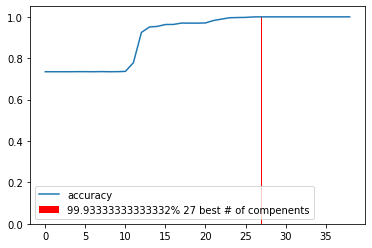

In [84]:
plt.plot(lst,label='accuracy')
plt.bar(lst.index(np.max(lst)),1,color='red',width=0.2,label='{}% {} best # of compenents'.format(np.max(lst)*100,lst.index(np.max(lst))))
plt.legend()
plt.show()

For readmitted

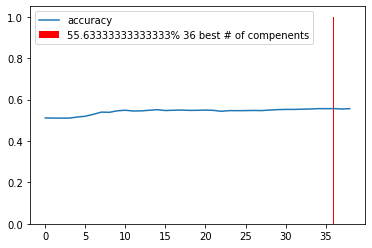

In [85]:
sub_data_att = indpnt_att[0:10000]
sub_data_target = target[0:10000]['readmitted']
x_train,x_test,y_train,y_test = train_test_split(sub_data_att,sub_data_target,test_size=0.30)

lst = list()
for i in range(1,40):

  svm_pipline = Pipeline([('pca',PCA(n_components=i)),
                        ('std',StandardScaler()),
                        ('svc',SVC(random_state=57)),
                        ])


  svm_pipline.fit(x_train,y_train)

  svm_pipline_test = Pipeline([('pca',PCA(n_components=i)),
                        ('std',StandardScaler()),
                        ])

  svm_pipline_test.fit(x_test,y_test)
  lst.append(svm_pipline.score(x_test,y_test))


plt.plot(lst,label='accuracy')
plt.bar(lst.index(np.max(lst)),1,color='red',width=0.2,label='{}% {} best # of compenents'.format(np.max(lst)*100,lst.index(np.max(lst))))
plt.legend()
plt.show()


#choson reduce n_componnets

In [0]:
pca_red=PCA(n_components=27,random_state=57)
indpnt_att_red=pca_red.fit_transform(indpnt_att,target_code)

#Notmalization

In [0]:
std_scale=StandardScaler()
indpnt_att_red=std_scale.fit_transform(indpnt_att_red)

In [88]:
indpnt_att_red[0]

array([-1.31895470e+00, -1.20616082e+00, -6.91879719e-01,  7.25841873e-01,
        5.55911565e-02, -9.14346378e-01, -1.18621919e-01,  8.63818474e-01,
        2.74593336e+00, -2.23485656e+00,  1.16212828e+00, -8.94920086e-01,
        1.71744605e-04, -1.72776936e+00, -6.37483490e-01, -3.77510487e-01,
       -1.17563774e+00,  7.56373711e-01, -6.26799574e-01, -8.28268960e-02,
       -1.53594694e-01, -2.00495781e-01, -5.72438676e-01, -3.03207108e-01,
       -7.13775608e-02, -6.12168550e-02, -1.63350937e-01])

#Create Train and Testing sets

Split the data for the target column 'diabetesMes' then for 'readmitted'

In [0]:
x_train_dia,x_test_dia,y_train_dia,y_test_dia = train_test_split(indpnt_att_red,target['diabetesMed'],test_size=0.30,random_state=57)
x_train_rea,x_test_rea,y_train_rea,y_test_rea = train_test_split(indpnt_att_red,target['readmitted'],test_size=0.30,random_state=57)

In [94]:
x_train_dia.shape,y_train_dia.shape

((70170, 27), (70170,))

In [95]:
x_test_rea.shape,y_test_rea.shape

((30074, 27), (30074,))

#Random Forest

In [96]:
rf_model = RandomForestClassifier(n_estimators=200,random_state=57)
rf_model.fit(x_train_dia,y_train_dia)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=57, verbose=0,
                       warm_start=False)

In [97]:
rf_model.score(x_test_dia,y_test_dia)

0.9980049211943872

In [98]:
rf_model = RandomForestClassifier(n_estimators=200,random_state=57)
rf_model.fit(x_train_rea,y_train_rea)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=57, verbose=0,
                       warm_start=False)

In [0]:
rf_model.score(x_test_rea,y_test_rea)

In [77]:
#rf_cross_score = cross_val_score(rf_model,x_test,y_test,cv=6)
#rf_cross_score  

array([0.54199082, 0.55515659, 0.54968077, 0.54968077, 0.55766161,
       0.5528731 ])

In [78]:
#rf_cross_score.mean()

0.5511739442864886

##SVM Model

In [99]:
svc_model=SVC(random_state=57)
svc_model.fit(x_train_dia,y_train_dia) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=57, shrinking=True, tol=0.001,
    verbose=False)

In [100]:
svc_model.score(x_test_dia,y_test_dia)

0.9978719159406797

In [101]:
svc_model=SVC(random_state=57)
svc_model.fit(x_train_rea,y_train_rea)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=57, shrinking=True, tol=0.001,
    verbose=False)

In [102]:
svc_model.score(x_test_rea,y_test_rea)

0.5751479683447496

In [0]:
#svc_cross_score=cross_val_score(svc_model,x_test,y_test,cv=6 )
#svc_cross_score  

array([0.56852184, 0.56612807, 0.5736233 , 0.56544294, 0.56803671,
       0.57881085])

In [0]:
#svc_cross_score.mean()

0.5700939528494868

In [0]:
#sgd_model = SGDClassifier(random_state=57)
#sgd_model.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=57, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
#sgd_model.score(x_test,y_test)

0.5511072687371151

In [0]:
#sgd_cross_score = cross_val_score(sgd_model,x_test,y_test,cv=6)
#sgd_cross_score 

array([0.54338719, 0.5443846 , 0.54449322, 0.54888268, 0.55267358,
       0.5442937 ])

In [0]:
#sgd_cross_score.mean()

0.5463524949523365